# Unit 4.3: Implementing a Multilayer Perceptron (XOR)

## Part 1 of 2

## 1) Installing Libraries

In [1]:
# !conda install numpy pandas matplotlib scikit-learn --yes

In [2]:
# !pip install torch torchvision torchaudio

In [3]:
# !conda install watermark --yes

In [4]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,torch,scikit-learn --conda

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.6.0

numpy       : 1.23.4
pandas      : 1.5.2
matplotlib  : 3.6.2
torch       : 1.13.0
scikit-learn: 1.2.0

conda environment: dl-fundamentals



## 2) Loading the Dataset

In [5]:
import pandas as pd

df = pd.read_csv("xor.csv")
df

,x1,x2,class label
0,0.781306,1.062984,0
1,-1.060524,-1.095550,0
2,0.632125,0.674028,0
3,-1.424712,0.535203,1
4,1.383161,1.368510,0
...,...,...,...
745,0.792484,0.839275,0
746,0.582466,-0.749250,1
747,-1.593475,0.671721,1
748,-0.812671,-0.268542,0


In [6]:
# !pip install scikit-learn

In [7]:
X = df[["x1", "x2"]].values
y = df["class label"].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

In [9]:
print("Training size:", X_train.shape)
print("Validation size :", X_val.shape)
print("Test size: ", X_test.shape)

Training size: (573, 2)
Validation size : (64, 2)
Test size:  (113, 2)


In [10]:
import numpy as np

print("Training labels:", np.bincount(y_train))
print("Validation labels:", np.bincount(y_val))
print("Test labels:", np.bincount(y_test))

Training labels: [287 286]
Validation labels: [32 32]
Test labels: [57 56]


## 3) Visualizing the dataset

- Same code as in previous units (see perceptron & logistic regression code notebooks)

In [17]:
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 300

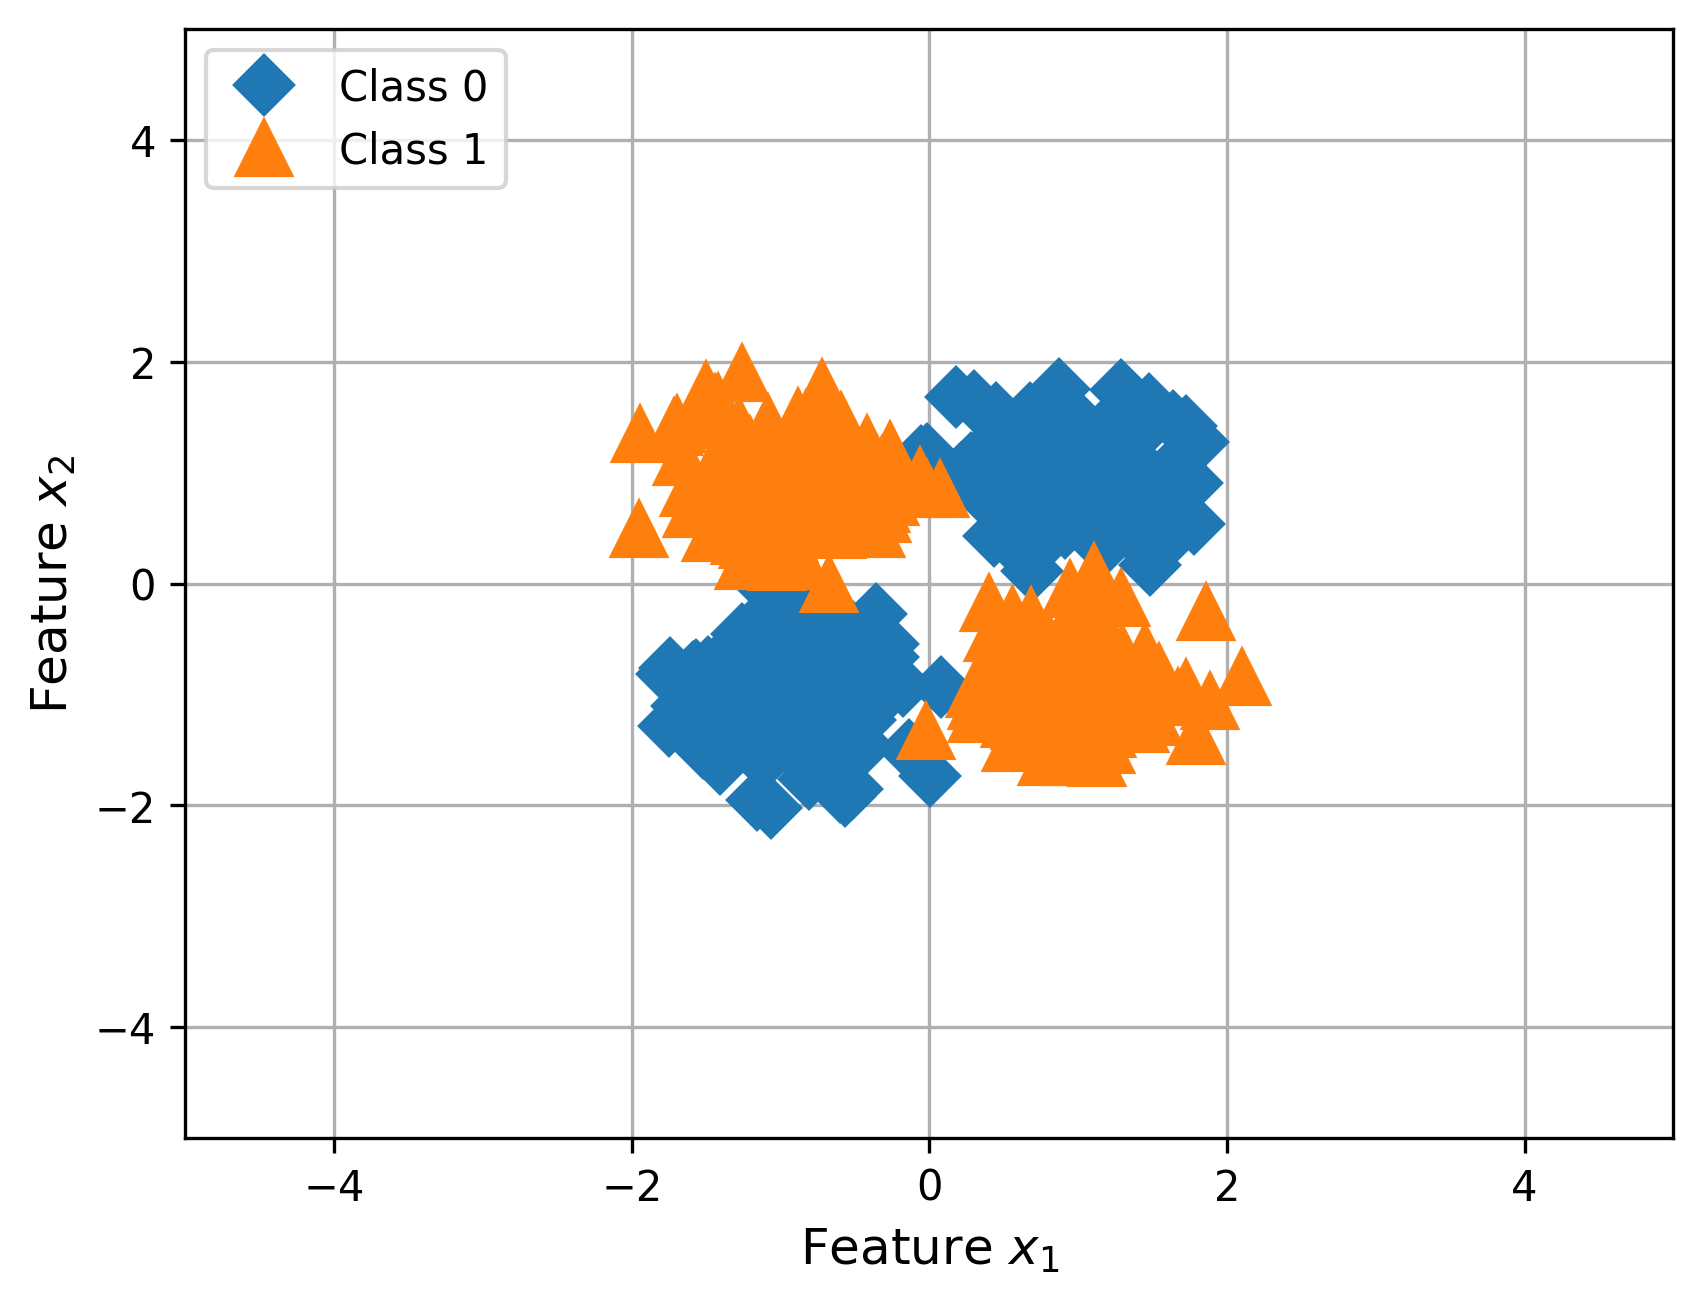

In [18]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the model

In [13]:
import torch


class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
                
            # 1st hidden layer
            torch.nn.Linear(num_features, 25),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(25, 15),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(15, num_classes),
        )

    def forward(self, x):
        logits = self.all_layers(x)
        return logits

## 5) Defining a DataLoader

- More details in Unit 4.4

In [14]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, X, y):

        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]        
        return x, y

    def __len__(self):
        return self.labels.shape[0]
    

train_ds = MyDataset(X_train, y_train)
val_ds = MyDataset(X_val, y_val)
test_ds = MyDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_ds,
    batch_size=32,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=32,
    shuffle=False,
)